In [2]:

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import re  ##Regular Expressions
import nltk ##Natural Language Toolkit
#pip install contractions
import contractions ## Short forms. eg. can't, etc
#pip install inflect
#import inflect

In [4]:
data_length = 1000  ##Rows of training set to be used.

##Reading File
dataset = pd.read_csv('./movie-review-sentiment-analysis-kernels-only/train.tsv', delimiter = '\t') ### 
X = dataset.iloc[:data_length, :-1]
#y = dataset.iloc[:1000, 3]
y = dataset.iloc[:data_length, 3].values

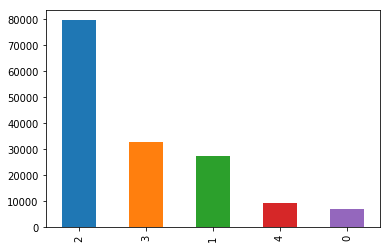

            PhraseId     SentenceId      Sentiment
count  156060.000000  156060.000000  156060.000000
mean    78030.500000    4079.732744       2.063578
std     45050.785842    2502.764394       0.893832
min         1.000000       1.000000       0.000000
25%     39015.750000    1861.750000       2.000000
50%     78030.500000    4017.000000       2.000000
75%    117045.250000    6244.000000       3.000000
max    156060.000000    8544.000000       4.000000


In [5]:
dataset['Sentiment'].value_counts().plot(kind='bar')
plt.show()
print(dataset.describe())

In [7]:
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [8]:
from scipy.stats import pearsonr #pearsonr(x, y) Pearson correlation coefficient and the p-value for testing non-correlation. 

correlation0 = pearsonr(dataset['PhraseId'], dataset['Sentiment'])
correlation1 = pearsonr(dataset['SentenceId'], dataset['Sentiment'])

dataset = dataset.iloc[:data_length, [2, 3]]  ##Dimension Reduction. Irrelevant Columns
dataset.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [11]:
##Stopword Elimination. Irrelevant words for sentence meaning.
#nltk.download('stopwords')  ##Articles, conjuctions, etc.. 
# nltk.download('wordnet')    ## Lemmatization. Word Net Lemmatizer

from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer ##Stemming
#from nltk.stem.snowball import SnowballStemmer ##Stemming
from nltk.stem import WordNetLemmatizer

corpus = [] ### Array to be filled with filtered reviews.

##Iterate through the rows.
for i in range(0, data_length):
    
    contractions.fix(dataset['Phrase'][i]) ##Remove Contractions
    
    ###re.sub(phrase, replace, string)
    review = re.sub('[^a-zA-Z ]', '', dataset['Phrase'][i]) ##Remove everything apart from letters and spaces from the 'i'th review.
    ###Does not subtract leters from a-z. Space should not be removed
    review = review.lower()  ## Convert all letters to lower case
    
    #review  = review.split()  ## Split string to list of words. Regular Expressions function.
    #nltk.download('punkt') ##The punkt.zip file contains pre-trained Punkt sentence tokenizer models that detect sentence boundaries.
    review = nltk.word_tokenize(review, language = 'english') ##Split larger text into segments.
   
    #ps = PorterStemmer() 
    #ss = SnowballStemmer("english")
    wnl = WordNetLemmatizer() ##wordnet
    
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #review = [ss.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = [wnl.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    ###Stemming/Lemmatization clubs words with same roots. 
    
    review = ' '. join(review)  ##Convert the list of words back into a string, separating each word with a "space".
    
    corpus.append(review)  ##Append the 'i'th review into the corpus array.
    
corpus[0]

'series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story'

In [12]:
corpus

['series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story',
 'series escapade demonstrating adage good goose',
 'series',
 '',
 'series',
 'escapade demonstrating adage good goose',
 '',
 'escapade demonstrating adage good goose',
 'escapade',
 'demonstrating adage good goose',
 'demonstrating adage',
 'demonstrating',
 'adage',
 '',
 'adage',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 'good',
 'goose',
 '',
 'goose',
 'goose',
 'also good gander occasionally amuses none amount much story',
 'also good gander occasionally amuses none amount much story',
 'also',
 'also',
 'good gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander',
 'gander',
 'gander',
 '',
 'occasionally amuses none amount much story',
 '',
 '',
 '',
 '',
 'occasionally amuses none amount much story',
 'occasionally',
 '

In [14]:
#Creating the Bag of Words Model
##Convert a collection of text documents to a sparse matrix of token counts
from sklearn.feature_extraction.text  import CountVectorizer
countvect = CountVectorizer(max_features = 800)
X_matrix = countvect.fit_transform(corpus).toarray()

X_matrix[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [15]:
word_frequency = pd.DataFrame(data = list(zip(X_matrix.sum(axis=0), np.asarray(countvect.get_feature_names()))), columns = ['Frequency', 'Word'])
word_frequency

,Frequency,Word
0,6,absolute
1,7,action
2,23,actor
3,8,actually
4,8,adage
5,7,age
6,3,aggressive
7,7,aim
8,7,almost
9,5,also


In [17]:
##Normalized representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidvect = TfidfVectorizer(stop_words='english', max_features = 800)   ## Limit the number of words to 200
X_matrix_normalized = tfidvect.fit_transform(corpus).toarray()

X_matrix_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.30200728,
       0.        , 0.        , 0.        , 0.29139646, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.30823527, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.32344696, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#Data Visualization
Reviews_Dataframe = pd.DataFrame(data = list(zip(np.asarray(corpus), dataset['Sentiment'])), columns = ['Review', 'Sentiment'])
Reviews_Dataframe = Reviews_Dataframe[Reviews_Dataframe['Review'] != ''] ##Remove Rows with empty 'Review'
##Segment based on Sentiment Value
Sent_0, Sent_1, Sent_2, Sent_3, Sent_4 = [x for _, x in Reviews_Dataframe.groupby(Reviews_Dataframe['Sentiment'])]